<a href="https://colab.research.google.com/github/42sanketsawhney/FRAUD-DETECTION/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

In [2]:
df = pd.read_csv("Fraudulent2.csv")

In [3]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [4]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [6]:
mean_age = df['Customer Age'].mean()
df.loc[df['Customer Age'] < 10 , 'Customer Age'] = mean_age

<ipython-input-6-57a24111d6b5>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.56020986714056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Customer Age'] < 10 , 'Customer Age'] = mean_age


In [7]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.741608,0.051705,178.660531,11.266015
std,282.046669,1.419663,9.746543,0.221436,107.388682,6.980659
min,10.000000,1.000000,10.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [8]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [9]:
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [10]:
df = df.drop(["Transaction ID","Customer ID","Customer Location","Transaction Date","IP Address","Shipping Address","Billing Address"], axis=1)

In [11]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,42.32,PayPal,electronics,1,40.0,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35.0,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29.0,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45.0,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42.0,desktop,0,116,15,1


In [12]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Payment Method', 'Product Category', 'Device Used']

In [13]:
df['Payment Method'].value_counts()

,count
Payment Method,
debit card,5952
credit card,5923
PayPal,5899
bank transfer,5860


In [14]:
df['Payment Method'] = df['Payment Method'].map({"debit card":0,"credit card":1,"PayPal":2,"bank transfer":3})

In [15]:
df['Product Category'].value_counts()


,count
Product Category,
home & garden,4786
electronics,4748
toys & games,4730
clothing,4699
health & beauty,4671


In [16]:
df['Product Category'] = df['Product Category'].map({"home & garden":0,"electronics":1,"toys & games":2,"clothing":3,"health & beauty":4})

In [17]:
df['Device Used'].value_counts()


,count
Device Used,
desktop,7923
mobile,7881
tablet,7830


In [18]:
df['Device Used'] = df['Device Used'].map({"desktop":0,"mobile":1,"tablet":2,})


In [19]:
new_column_order = ['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
                   'Customer Age', 'Device Used','Address Match' , 'Account Age Days',
                   'Transaction Hour','Is Fraudulent']
df = df.reindex(columns=new_column_order)
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Address Match,Account Age Days,Transaction Hour,Is Fraudulent
0,42.32,2,1,1,40.00000,0,1,282,23,0
1,301.34,1,1,3,35.00000,2,1,223,0,0
2,340.32,0,2,5,29.00000,0,0,360,8,0
3,95.77,1,1,5,45.00000,1,1,325,20,0
4,77.45,1,3,5,42.00000,0,1,116,15,0
...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2,2,5,32.00000,2,1,363,16,0
23630,47.42,1,3,4,41.00000,0,1,296,17,0
23631,1045.23,3,4,1,34.56021,2,1,329,23,0
23632,34.25,0,0,2,39.00000,1,1,347,11,0


In [20]:
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Address Match,Account Age Days,Transaction Hour,Is Fraudulent
0,-0.663192,2,1,-1.409202,0.539525,0,1,0.962314,1.680964,0
1,0.255186,1,1,-0.000387,0.026512,2,1,0.412896,-1.613924,0
2,0.393393,0,2,1.408427,-0.589104,0,0,1.688663,-0.467876,0
3,-0.473680,1,1,1.408427,1.052538,1,1,1.362737,1.251196,0
4,-0.538635,1,3,1.408427,0.744730,0,1,-0.583505,0.534916,0


<Axes: >

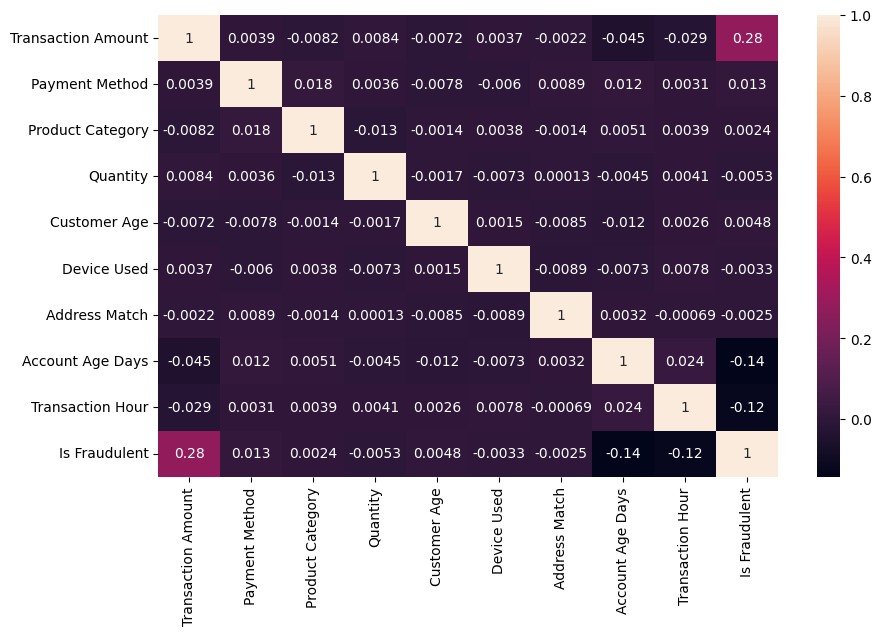

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

**MODELING THE DATA : **

***HANDING IMBALANCE ***

In [21]:
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X.shape, y.shape

((23634, 9), (23634,))

In [22]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)

(44824, 9) (44824,)


In [23]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print(X_under_resampled.shape,y_under_resampled.shape)

(2444, 9) (2444,)


In [24]:
print(y_resampled.value_counts())
print(y_under_resampled.value_counts())


Is Fraudulent
0    22412
1    22412
Name: count, dtype: int64
Is Fraudulent
0    1222
1    1222
Name: count, dtype: int64


In [25]:
# Random Under Sampler
X_train,X_test,y_train,y_test = train_test_split(X_under_resampled,y_under_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       248
           1       0.76      0.72      0.74       241

    accuracy                           0.75       489
   macro avg       0.75      0.75      0.75       489
weighted avg       0.75      0.75      0.75       489



In [26]:
# SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4555
           1       0.96      0.97      0.97      4410

    accuracy                           0.97      8965
   macro avg       0.97      0.97      0.97      8965
weighted avg       0.97      0.97      0.97      8965

